<a href="https://colab.research.google.com/github/vimalkumarmdb/A-novel-SVM-kNN-PSO-Ensemble-method-for-intrusion-detection-system-/blob/master/Soft_Computing_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Soft Computing

# Import all library which i need to preprocess the dataset

In [0]:
import zipfile
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
zip_ref = zipfile.ZipFile("/content/drive/My Drive/SoftComputingProject/kddcup.zip", 'r')
zip_ref.extractall()
zip_ref.close()

# =============================Traning Datasets================ 

In [0]:
feature_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack_types"]


R2L=['warezmaster.','warezclient.','spy.','phf.','multihop.','imap.','guess_passwd.','ftp_write.']

U2R=['rootkit.','perl.','loadmodule.','buffer_overflow.']
DoS=['smurf.','teardrop.','back.','land.','neptune.','pod.']
Probe=['ipsweep.','nmap.','portsweep.','satan.']

In [0]:
import numpy as np
import pandas as pd

In [0]:
df = pd.read_csv("/content/kddcup.data_10_percent_corrected",names =feature_names)

## Top five row and column

In [0]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_types
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [0]:
def classify(df,attack_types):
    attack_type=[]
    for i in df['attack_types']:
        if i == 'normal.':
            attack_type.append('Normal')
        elif i in R2L:
            attack_type.append('R2L')
        elif i in U2R:
            attack_type.append('U2R')
        elif i in DoS:
            attack_type.append('DoS')
        else:
            attack_type.append('Probe')
    return attack_type
df['label']=classify(df,'attack_types')

In [0]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_types,label
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,Normal
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,Normal
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,Normal
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,Normal
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,Normal


## Bottom five row and columns

In [0]:
df.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_types,label
494016,0,tcp,http,SF,310,1881,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,5,0.00,0.00,0.0,0.0,1.0,0.0,0.40,86,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.,Normal
494017,0,tcp,http,SF,282,2286,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,6,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.,Normal
494018,0,tcp,http,SF,203,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,18,0.17,0.11,0.0,0.0,1.0,0.0,0.17,16,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.,Normal
494019,0,tcp,http,SF,291,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,12,0.00,0.00,0.0,0.0,1.0,0.0,0.17,26,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.,Normal
494020,0,tcp,http,SF,219,1234,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,35,0.00,0.00,0.0,0.0,1.0,0.0,0.14,6,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.,Normal


## Data Size

In [0]:
df.shape

(494021, 43)

# ================== Preprocessing the dataset =====================

## Remove redundant features from dataset

In [0]:
df['num_outbound_cmds'].value_counts()
df.drop('num_outbound_cmds', axis=1, inplace=True)
df['is_host_login'].value_counts()
df.drop('is_host_login', axis=1, inplace=True)

## Transform of categorical features

In [0]:
df['protocol_type'] = df['protocol_type'].astype('category')
df['service'] = df['service'].astype('category')
df['flag'] = df['flag'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [0]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_types,label
0,0,1,22,9,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,Normal
1,0,1,22,9,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,Normal
2,0,1,22,9,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,Normal
3,0,1,22,9,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,Normal
4,0,1,22,9,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,Normal


## Remove duplicates from dataframe

In [0]:
def remove_duplicate(df):
  print('Before remove duplicate shape',df.shape)
  df.drop_duplicates(subset=None, keep='first', inplace=True)
  print('After remove duplicate shape',df.shape)
  return df

In [0]:
df = remove_duplicate(df)

Before remove duplicate shape (494021, 41)
After remove duplicate shape (145586, 41)


In [0]:
df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_s

In [0]:
df.shape

(145586, 41)

## Check lablel of dataset 

In [0]:
df['label'].value_counts()

Normal    87832
DoS       54572
Probe      2131
R2L         999
U2R          52
Name: label, dtype: int64

In [0]:
df['attack_types'].value_counts()

normal.             87832
neptune.            51820
back.                 968
teardrop.             918
satan.                906
warezclient.          893
ipsweep.              651
smurf.                641
portsweep.            416
pod.                  206
nmap.                 158
guess_passwd.          53
buffer_overflow.       30
warezmaster.           20
land.                  19
imap.                  12
rootkit.               10
loadmodule.             9
ftp_write.              8
multihop.               7
phf.                    4
perl.                   3
spy.                    2
Name: attack_types, dtype: int64

# ================= Exploratory data analysis =====================

## For visulization import necessary library 

In [0]:
import matplotlib.pyplot as plt
import seaborn as sn

## Distribution of attacks

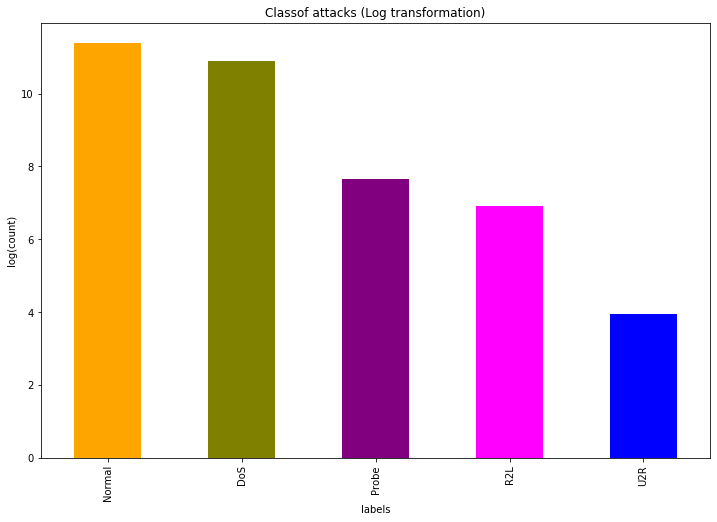

In [0]:
plt.figure(figsize=(12,8))
plt.title('Classof attacks (Log transformation)')
df['label'].value_counts().apply(np.log).plot(kind='bar', color = ['orange','Olive','purple','Fuchsia','blue'])
plt.xlabel("labels")
plt.ylabel("log(count)")
plt.show()

In [0]:
color_names=["pink",	"magenta","purple","indigo","silver","grey","black",	"Fuchsia"	,"teal","cyan","green",	"chartreuse",
 	 	 	 	 	 	 	 	 	 	 	 	 	 	 	 
"olive",'orange','Olive','purple','blue',	"gold","orange","brown","maroon",	"violet"]

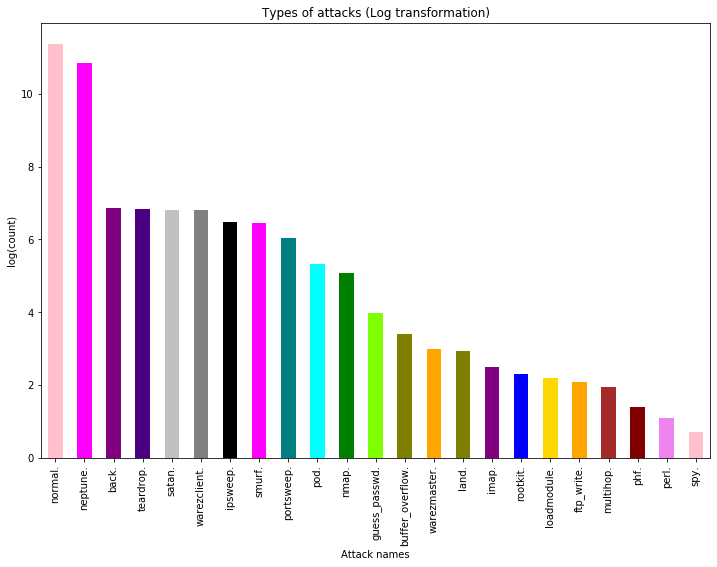

In [0]:
plt.figure(figsize=(12,8))
plt.title("Types of attacks (Log transformation)")
df['attack_types'].value_counts().apply(np.log).plot(kind='bar',color = color_names)
plt.xlabel("Attack names")
plt.ylabel("log(count)")
plt.show()

In [0]:
import pandas_profiling 
%matplotlib inline

In [0]:
def pd_profile_report(df,threshold =0.4, file_names = 'Analysis_report.html' ):
  pfr = pandas_profiling.ProfileReport(df,correlation_threshold =threshold,
                                     bins = 20)
  name = file_names
  pfr.to_file(str(name))
  return pfr

In [0]:
ppr = pd_profile_report(df,threshold =0.4,file_names = 'my_Analysis_report.html')

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [0]:
variable =ppr.get_rejected_variables(threshold =.4)
variable

['logged_in',
 'su_attempted',
 'num_root',
 'num_access_files',
 'is_guest_login',
 'count',
 'serror_rate',
 'srv_serror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [0]:
def feature_remove(df,variable):
  df =df.drop(variable,axis =1)
  return df

## ===================================Feature selection=============================

In [0]:
df = feature_remove(df,variable)

In [0]:
feature_drop= ['urgent','wrong_fragment','num_compromised','num_failed_logins','num_file_creations','num_shells','src_bytes','attack_types']
mydf = feature_remove(df,feature_drop)

In [0]:
mydf = remove_duplicate(mydf)

Before remove duplicate shape (145586, 14)
After remove duplicate shape (67266, 14)


In [0]:
def minMax_scaler(df):
  data =df.drop(["label"],axis=1) 
  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler()
  train_data = scaler.fit_transform(data)
  names= data.columns
  dfa = pd.DataFrame(train_data, columns= names)
  return dfa

In [0]:
mydf1 = minMax_scaler(mydf)

In [0]:
mydf1.shape

(67266, 13)

In [0]:
import copy as copy
scaled_df = copy.deepcopy(mydf1)

In [0]:
mydf['label'].isnull().sum()

0

In [0]:
ppr2 = pd_profile_report(mydf1,threshold =.4,file_names = 'my_Analysis_report2.html')
variable =ppr2.get_rejected_variables(threshold =.4)
variable

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


[]

* shape of data

In [0]:
mydf1.shape,mydf.shape

((67266, 13), (67266, 14))

## One Hot Encoder

In [0]:
def target_feature(mydf):
  #mydf['label']= mydf['label'].value_counts().apply(np.log)  # log transformation
  target = mydf['label'] 
  return target

In [0]:
y= target_feature(mydf)

In [0]:
y.shape

(67266,)

In [0]:
from sklearn.preprocessing import label_binarize,LabelEncoder,OneHotEncoder 

In [0]:
def oneVSall(target):
  label_encoder = LabelEncoder()
  integer_encoded = label_encoder.fit_transform(target)
  onehot_encoder = OneHotEncoder(sparse=False,categories='auto')
  integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
  my_target = onehot_encoder.fit_transform(integer_encoded)
  target_vari = pd.DataFrame(my_target, columns =['Dos','Normal', 'Probe', 'R2L','U2R'] )
  return target_vari

In [0]:
y =  oneVSall(y)
y

,Dos,Normal,Probe,R2L,U2R
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
67261,0.0,1.0,0.0,0.0,0.0
67262,0.0,1.0,0.0,0.0,0.0
67263,0.0,1.0,0.0,0.0,0.0
67264,0.0,1.0,0.0,0.0,0.0


In [0]:
X= mydf1

In [0]:
X.shape

(67266, 13)

In [0]:
columns_names = X.columns

# ======================= Testing Dataset ===========================

In [0]:
zip_ref = zipfile.ZipFile("/content/drive/My Drive/SoftComputingProject/corrected_data.zip", 'r')
zip_ref.extractall()
zip_ref.close()

In [0]:
corrected_df = pd.read_csv("/content/corrected_data.csv",names =feature_names)

In [0]:
corrected_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_types
0,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [0]:
R2L=['warezmaster.','warezclient.','spy.','phf.','multihop.','imap.','guess_passwd.','ftp_write.','named.','sendmail.','snmpgetattack.',
    'worm.','xlock.','xsnoop.','httptunnel.']

U2R=['rootkit.','perl.','loadmodule.','buffer_overflow.','ps.','sqlattack.','xterm.']
DoS=['smurf.','teardrop.','back.','land.','neptune.','pod.','apache2.','mailbomd.','processtable.','udpstrom']
Probe=['ipsweep.','nmap.','portsweep.','satan.','mscan','saint']

# ====================== Preprocessing step =========================

In [0]:
corrected_df['label']=classify(corrected_df,'attack_types')

In [0]:
corrected_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_types,label
0,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.,Normal
1,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.,Normal
2,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.,Normal
3,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.,R2L
4,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.,R2L


## =================== Remove redundant features from dataset ==================

In [0]:
corrected_df['num_outbound_cmds'].value_counts()
corrected_df.drop('num_outbound_cmds', axis=1, inplace=True)
corrected_df['is_host_login'].value_counts()
corrected_df.drop('is_host_login', axis=1, inplace=True)

## ================== Transform of categorical features to numerical =======================

In [0]:
corrected_df['protocol_type'] = corrected_df['protocol_type'].astype('category')
corrected_df['service'] = corrected_df['service'].astype('category')
corrected_df['flag'] = corrected_df['flag'].astype('category')
cat_columns = corrected_df.select_dtypes(['category']).columns
corrected_df[cat_columns] = corrected_df[cat_columns].apply(lambda x: x.cat.codes)

In [0]:
corrected_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_types,label
0,0,2,46,9,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.,Normal
1,0,2,46,9,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.,Normal
2,0,2,46,9,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.,Normal
3,0,2,46,9,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.,R2L
4,0,2,46,9,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.,R2L


## ===================Remove duplicates from dataframe =====================

In [0]:
corrected_df = remove_duplicate(corrected_df)

Before remove duplicate shape (311029, 41)
After remove duplicate shape (77291, 41)


## ========================== Check null values in datasets =========================



In [0]:
corrected_df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_s

# ===================== Data Visulization =====================

## Check how many time attack are occurred

In [0]:
corrected_df['attack_types'].value_counts()

normal.             47913
neptune.            20332
guess_passwd.        1302
mscan.               1049
warezmaster.         1002
smurf.                936
satan.                860
apache2.              794
processtable.         744
back.                 386
saint.                364
snmpguess.            359
mailbomb.             308
snmpgetattack.        179
portsweep.            174
ipsweep.              155
httptunnel.           145
nmap.                  80
pod.                   45
buffer_overflow.       22
multihop.              18
named.                 17
ps.                    16
sendmail.              15
rootkit.               13
xterm.                 13
teardrop.              12
land.                   9
xlock.                  9
xsnoop.                 4
ftp_write.              3
perl.                   2
worm.                   2
sqlattack.              2
loadmodule.             2
udpstorm.               2
phf.                    2
imap.                   1
Name: attack

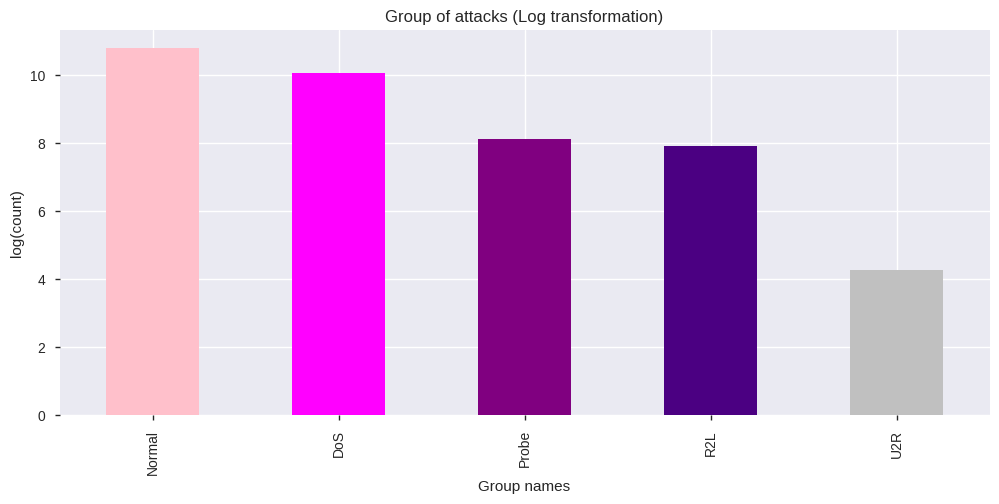

In [0]:
plt.figure(figsize=(12,5))
plt.title('Group of attacks (Log transformation)')
corrected_df['label'].value_counts().apply(np.log).plot(kind='bar',color = color_names)
plt.xlabel("Group names")
plt.ylabel("log(count)")
plt.show()

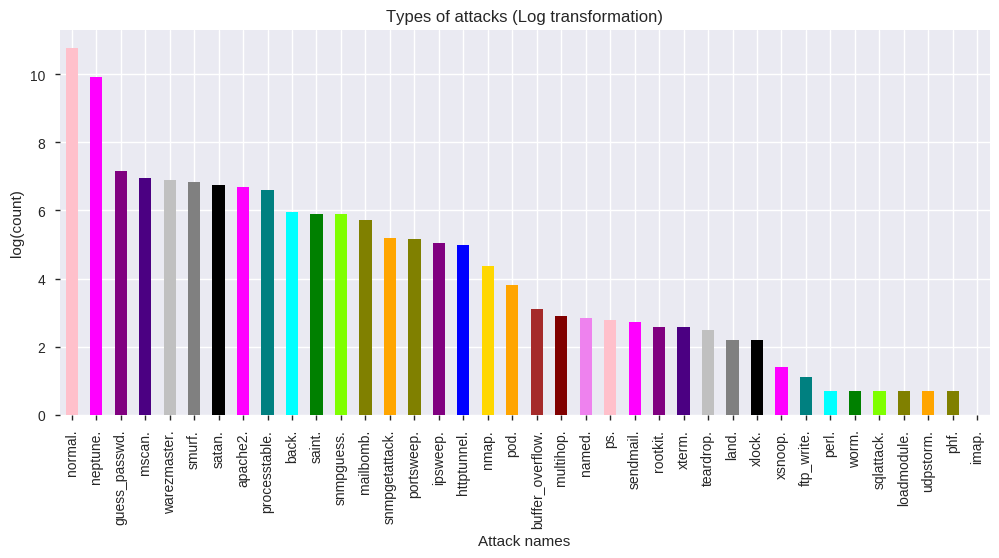

In [0]:
plt.figure(figsize=(12,5))
plt.title("Types of attacks (Log transformation)")
corrected_df['attack_types'].value_counts().apply(np.log).plot(kind='bar',color = color_names)
plt.xlabel("Attack names")
plt.ylabel("log(count)")
plt.show()

In [0]:
corrected_df.shape

(77291, 41)

In [0]:
corrected_label = corrected_df['label']

In [0]:
corrected_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_types,label
0,0,2,46,9,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.,Normal
3,0,2,46,9,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.,R2L
4,0,2,46,9,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.,R2L
5,0,2,46,9,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.,R2L
6,0,2,11,9,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0.0,0.0,0.0,0.0,0.5,1.0,0.0,10,3,0.3,0.30,0.30,0.0,0.0,0.0,0.0,0.0,normal.,Normal


In [0]:
resample_data = corrected_df[columns_names]

In [0]:
resample_data.shape, corrected_df.shape, X.shape

((77291, 13), (77291, 41), (67266, 13))

In [0]:
resample_data.head()

,duration,protocol_type,service,flag,dst_bytes,land,hot,root_shell,srv_count,rerror_rate,diff_srv_rate,srv_diff_host_rate,dst_host_srv_diff_host_rate
0,0,2,46,9,146,0,0,0,1,0.0,0.0,0.0,0.0
3,0,2,46,9,146,0,0,0,2,0.0,0.0,0.0,0.0
4,0,2,46,9,146,0,0,0,2,0.0,0.0,0.0,0.0
5,0,2,46,9,146,0,0,0,2,0.0,0.0,0.0,0.0
6,0,2,11,9,0,0,0,0,1,0.0,1.0,0.0,0.0


## Add label to dataframe

In [0]:
resample_data['label'] = corrected_label

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
resample_data.shape

(77291, 14)

## Remove  duplicate from dataframe

---



In [0]:
corrected_sample_df = remove_duplicate(resample_data)

Before remove duplicate shape (77291, 14)
After remove duplicate shape (46883, 14)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
corrected_sample_df.shape

(46883, 14)

## Split test data into 6 subset

In [0]:
def subset_data(Data, subset):
    split = len(Data) / float(subset)
    mydata = []
    last = 0.0

    while last < len(Data):
       mydata.append(Data[int(last):int(last + split)])
       last += split
    return mydata

In [0]:
data1,data2,data3,data4,data5,data6,data7   =subset_data(corrected_sample_df, 7)

In [0]:
data1.shape,data2.shape,data3.shape,data4.shape,data5.shape,data6.shape, data7.shape

((6697, 14),
 (6698, 14),
 (6697, 14),
 (6698, 14),
 (6697, 14),
 (6698, 14),
 (6698, 14))

## OneHot encoder

In [0]:
y1= target_feature(data1)
y2= target_feature(data2)
y3= target_feature(data3)
y4= target_feature(data4)
y5= target_feature(data5)
y6= target_feature(data6)
y7 = target_feature(data7)

In [0]:
y1_test =  oneVSall(y1)

In [0]:
y2_test =  oneVSall(y2)

In [0]:
y3_test =  oneVSall(y3)

In [0]:
y4_test =  oneVSall(y4)

In [0]:
y5_test =  oneVSall(y5)

In [0]:
y6_test =  oneVSall(y6)

In [0]:
y7_valid = oneVSall(y7)

* Shape of evry taregt variable

In [0]:
y1_test.shape,y2_test.shape,y3_test.shape,y4_test.shape,y5_test.shape,y6_test.shape,y7_valid.shape

((6697, 5), (6698, 5), (6697, 5), (6698, 5), (6697, 5), (6698, 5), (6698, 5))

* x_test data




In [0]:
x1_test = minMax_scaler(data1)
x2_test = minMax_scaler(data2)
x2_test = minMax_scaler(data2)
x3_test = minMax_scaler(data3)
x4_test = minMax_scaler(data4)
x5_test = minMax_scaler(data5)

In [0]:
x6_test = minMax_scaler(data6)

In [0]:
x7_valid = minMax_scaler(data7)

In [0]:
x1_test.shape,x2_test.shape,x3_test.shape,x4_test.shape,x5_test.shape,x6_test.shape,x7_valid.shape

((6697, 13),
 (6698, 13),
 (6697, 13),
 (6698, 13),
 (6697, 13),
 (6698, 13),
 (6698, 13))

# =========================== SVM Model ========================

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [0]:
def SVM_model(X_train,y_train,X_test,data_type = 'traing set',expert = 5,no =1):
  clf = SVC(kernel ='rbf',C = expert,gamma= 'auto')
  m = OneVsRestClassifier(clf)
  train=m.fit(X_train,y_train)
  
  yPred= train.predict(X_test)
  y_Pred =pd.DataFrame(yPred, columns =['Dos','Normal', 'Probe', 'R2L','U2R'])
  print("SVM_{} ,".format(no) +  str(data_type) + " , predict on the expert no {}".format(expert))
  
  print("SVM_{}  ".format(no)  +  " Train on the expert no {}".format(expert))
  return y_Pred

## ====================== Prediction on diffrent expert ======================

In [0]:
X_train,y_train = X,y

In [0]:
y_Pred1 = SVM_model(X_train,y_train,x1_test,data_type = 'data 1',expert = 5,no =1)
y_Pred2 = SVM_model(X_train,y_train,x2_test,data_type = 'data 2',expert = 2,no =2)
y_Pred3 = SVM_model(X_train,y_train,x3_test,data_type = 'data 3',expert = 1,no =3)
y_Pred4 = SVM_model(X_train,y_train,x4_test,data_type = 'data 4',expert = 0.5,no =4)

SVM_1 ,data 1 , predict on the expert no 5
SVM_1   Train on the expert no 5
SVM_2 ,data 2 , predict on the expert no 2
SVM_2   Train on the expert no 2
SVM_3 ,data 3 , predict on the expert no 1
SVM_3   Train on the expert no 1
SVM_4 ,data 4 , predict on the expert no 0.5
SVM_4   Train on the expert no 0.5


In [0]:
y_Pred5 = SVM_model(X_train,y_train,x5_test,data_type = 'data 5',expert = 0.2,no =5)

SVM_5 ,data 5 , predict on the expert no 0.2
SVM_5   Train on the expert no 0.2


In [0]:
y_Pred6 = SVM_model(X_train,y_train,x6_test,data_type = 'data 6',expert = 6,no =6)

SVM_6 ,data 6 , predict on the expert no 6
SVM_6   Train on the expert no 6


In [0]:
def prediction_score(y_true, y_Pred, data_name = 'test set'):
  col_name =['Dos','Normal', 'Probe', 'R2L','U2R']
  score = list()
  for i in y_Pred:
    score.append(accuracy_score(y_true[i],y_Pred[i]))
  mydict = {'Dos':score[0]*100,'Normal':score[1]*100,'Probe':score[2]*100,
          'R2L':score[3]*100,'U2R':score[4]*100}
  print("Classification accuracy score on the " + str(data_name)+ "\n")
  return mydict

In [0]:
score1 =prediction_score(y1_test, y_Pred1, data_name = 'test set')

Classification accuracy score on the test set



In [0]:
score2 =prediction_score(y2_test, y_Pred2, data_name = 'test set')

Classification accuracy score on the test set



In [0]:
score3 =prediction_score(y3_test, y_Pred3, data_name = 'test set')

Classification accuracy score on the test set



In [0]:
score4 =prediction_score(y4_test, y_Pred4, data_name = 'test set')

Classification accuracy score on the test set



In [0]:
score5 =prediction_score(y5_test, y_Pred5, data_name = 'test set')

Classification accuracy score on the test set



In [0]:
score6 =prediction_score(y6_test, y_Pred6, data_name = 'test set')

Classification accuracy score on the test set



## ======================== Avg prediction score =========================

*   List item



In [0]:
all_score =[score1,score2,score3,score4,score5,score6,]

In [0]:
def all_prediction_score_avg(all_score):
  score = list()
  
  a1 = np.array(list(all_score[0].values()))
  a2 = np.array(list(all_score[1].values()))
  a3 = np.array(list(all_score[2].values()))
  a4 = np.array(list(all_score[3].values()))
  a5 = np.array(list(all_score[4].values()))
  a6 = np.array(list(all_score[5].values()))
  myresult = (a1+a2+a3+a4+a5+a6)/6
  for i in myresult:
    score.append(i)
  mydict = {'Dos':score[0],'Normal':score[1],'Probe':score[2],
        'R2L':score[3],'U2R':score[4]}
  return mydict

In [0]:
result_dict = all_prediction_score_avg(all_score)

In [0]:
result_dict

{'Dos': 97.48417208420112,
 'Normal': 96.50131540190254,
 'Probe': 98.49452050500769,
 'R2L': 98.9249876038049,
 'U2R': 99.85318480519489}

# ======================== Validate the SVM model =========================

In [0]:
from sklearn.model_selection import cross_val_score
expert =[5,2,1,0.5,0.2,0.1]
Score = []
for i in expert:
  clf = SVC(kernel ='rbf',C = i,gamma= 'auto')
  svm = OneVsRestClassifier(clf)
  score = cross_val_score(svm, x7_valid, y7_valid,cv =10 )
  Score.append(score)

In [0]:
Accuracy = np.array(Score).mean()
print("SVM model acuuracy: {}%". format(float(round(Accuracy*100))))

SVM model acuuracy: 97.0%


# =========================== Knn Model ===========================

In [0]:
from sklearn.neighbors import KNeighborsClassifier
def Knn_model(X_train, y_train, X_test, data_name = 'traing set',neighbors = 1,no =1):
  
  k_nn = KNeighborsClassifier(n_neighbors=neighbors, algorithm = 'auto', p=2, metric='euclidean')
  knn = OneVsRestClassifier(k_nn)
  train=knn.fit(X_train,y_train)

  yPred= train.predict(X_test)
  y_Pred =pd.DataFrame(yPred, columns =['Dos','Normal', 'Probe', 'R2L','U2R'])
  print("Knn_{} ,".format(no) +  str(data_name) + " , predict on the expert no {}".format(neighbors))

  print("Knn_{}  ".format(no)  +  " Train on the expert no {}".format(neighbors))
  return y_Pred

In [0]:
predict1 = Knn_model(X_train, y_train, x1_test, data_name = 'Data1',neighbors = 1,no =1)

Knn_1 ,Data1 , predict on the expert no 1
Knn_1   Train on the expert no 1


In [0]:
predict2 = Knn_model(X_train, y_train, x2_test, data_name = 'Data2',neighbors = 3,no =2)
predict3 = Knn_model(X_train, y_train, x3_test, data_name = 'Data3',neighbors = 5,no =3)
predict4 = Knn_model(X_train, y_train, x4_test, data_name = 'Data4',neighbors = 7,no =4)
predict5 = Knn_model(X_train, y_train, x5_test, data_name = 'Data5',neighbors = 9,no =5)
predict6 = Knn_model(X_train, y_train, x6_test, data_name = 'Data6',neighbors = 11,no =6)

Knn_2 ,Data2 , predict on the expert no 3
Knn_2   Train on the expert no 3
Knn_3 ,Data3 , predict on the expert no 5
Knn_3   Train on the expert no 5
Knn_4 ,Data4 , predict on the expert no 7
Knn_4   Train on the expert no 7
Knn_5 ,Data5 , predict on the expert no 9
Knn_5   Train on the expert no 9
Knn_6 ,Data6 , predict on the expert no 11
Knn_6   Train on the expert no 11


In [0]:
knn_pred_score1 = prediction_score(y1_test, predict1, data_name = 'test set')
knn_pred_score2 = prediction_score(y2_test, predict2, data_name = 'test set')
knn_pred_score3 = prediction_score(y3_test, predict3, data_name = 'test set')
knn_pred_score4 = prediction_score(y4_test, predict4, data_name = 'test set')
knn_pred_score5 = prediction_score(y5_test, predict5, data_name = 'test set')
knn_pred_score6 = prediction_score(y6_test, predict6, data_name = 'test set')

Classification accuracy score on the test set

Classification accuracy score on the test set

Classification accuracy score on the test set

Classification accuracy score on the test set

Classification accuracy score on the test set

Classification accuracy score on the test set



##  ======================== Avg prediction Knn score =========================

In [0]:
All_score = [knn_pred_score1,knn_pred_score2,knn_pred_score3,knn_pred_score4,knn_pred_score5,knn_pred_score6]

In [0]:
avg_accuracy_score = all_prediction_score_avg(All_score)

In [0]:
avg_accuracy_score

{'Dos': 97.54139418111016,
 'Normal': 90.62839104469408,
 'Probe': 96.79485736138254,
 'R2L': 93.6343808558488,
 'U2R': 99.83327242057892}

## ============================ Validate the model ============================

In [0]:
from sklearn.model_selection import cross_val_score
neighbors =[1,3,5,7,9,11]
myScore = []
for i in neighbors:
  k_nn = KNeighborsClassifier(n_neighbors=i, algorithm = 'auto', p=2, metric='euclidean')
  knn = OneVsRestClassifier(k_nn)
  score = cross_val_score(knn, x7_valid, y7_valid,cv =10 )
  myScore.append(score)

In [0]:
Accuracy = np.array(myScore).mean()
print("Knn model acuuracy: {}%". format(int(round(Accuracy*100))))

Knn model acuuracy: 97%


## =============================== PSO =================================

In [0]:
! pip install pyswarms

     |████████████████████████████████| 102kB 3.1MB/s 


In [0]:
x7_valid.loc[0:,].values

,duration,protocol_type,service,flag,dst_bytes,land,hot,root_shell,srv_count,rerror_rate,diff_srv_rate,srv_diff_host_rate,dst_host_srv_diff_host_rate
0,0.0,0.5,0.322581,1.0,0.000407,0.0,0.0,0.0,0.035225,0.0,0.0,0.00,0.01
1,0.0,0.5,0.322581,1.0,0.013792,0.0,0.0,0.0,0.052838,0.0,0.0,0.07,0.05
2,0.0,0.5,0.322581,1.0,0.000692,0.0,0.0,0.0,0.041096,0.0,0.0,0.14,0.05
3,0.0,0.5,0.322581,1.0,0.000973,0.0,0.0,0.0,0.031311,0.0,0.0,0.00,0.02
4,0.0,0.5,0.322581,1.0,0.000464,0.0,0.0,0.0,0.009785,0.0,0.0,0.00,0.03


In [0]:
x_max = 10 * np.ones(5)
x_min = -1 * x_max
bounds = (x_min, x_max)

In [0]:
bounds

(array([-10., -10., -10., -10., -10.]), array([10., 10., 10., 10., 10.]))

In [0]:
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
#from pyswarms.utils.environments import PlotEnvironment
%load_ext autoreload
%autoreload 2
options = {'c1': 0.8, 'c2': 0.6, 'w':0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=x7_valid.shape[0],dimensions=x7_valid.shape[1], options=options)
cost, pos = optimizer.optimize(fx.sphere, iters=1000)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


2019-11-20 05:45:15,044 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.8, 'c2': 0.6, 'w': 0.9}


pyswarms.single.global_best:   0%|          |0/1000

pyswarms.single.global_best:   0%|          |0/1000, best_cost=1.12

pyswarms.single.global_best:   0%|          |0/1000, best_cost=1.12

pyswarms.single.global_best:   0%|          |0/1000, best_cost=1.12

pyswarms.single.global_best:   0%|          |0/1000, best_cost=1.12

pyswarms.single.global_best:   0%|          |4/1000, best_cost=1.12

pyswarms.single.global_best:   0%|          |4/1000, best_cost=0.185

pyswarms.single.global_best:   0%|          |4/1000, best_cost=0.185

pyswarms.single.global_best:   0%|          |4/1000, best_cost=0.185

pyswarms.single.global_best:   0%|          |4/1000, best_cost=0.177

pyswarms.single.global_best:   0%|          |4/1000, best_cost=0.138

pyswarms.single.global_best:   0%|          |4/1000, best_cost=0.138

pyswarms.single.global_best:   0%|          |4/1000, be

In [0]:
#!conda install -c conda-forge ffmpeg

ERROR: The install method you used for conda--probably either `pip install conda`
or `easy_install conda`--is not compatible with using conda as an application.
If your intention is to install conda as a standalone application, currently
supported install methods include the Anaconda installer and the miniconda
installer.  You can download the miniconda installer from
https://conda.io/miniconda.html.



In [0]:
#from pyswarms.utils.environments import PlotEnvironment
#plt_env = PlotEnvironment(optimizer, fx.sphere_func, 1000)

In [0]:
weight=list(pos[0:12])

# ============Voting Ensemble for Classification=========

---



In [0]:
from sklearn.ensemble import VotingClassifier

In [0]:
from sklearn.pipeline import Pipeline

In [0]:
estimators = []
leng = [1,2,3,4,5,6]
for n,No in zip(([1,3,5,7,9,11]),leng):
  KNN = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=n, algorithm = 'auto', p=2, metric='euclidean'))
  estimators.append(("Knn_{} ,".format(No),KNN))

In [0]:
leng = [1,2,3,4,5,6]
for c,No in zip(([5,2,1,0.5,0.2,0.1]),leng):
  SVM = OneVsRestClassifier(SVC(kernel = 'rbf',C = c,gamma= 'auto',probability=True))
  estimators.append(("SVM_{} ,".format(No),SVM))

In [0]:
svm_knn =OneVsRestClassifier(VotingClassifier(estimators = estimators, voting='soft',weights=weight))
svm_knn = svm_knn.fit(X_train.values,y_train.values)
yPred=  svm_knn.predict(x1_test)

In [0]:
yPred2=  svm_knn.predict(x2_test)
yPred3=  svm_knn.predict(x3_test)
yPred4=  svm_knn.predict(x4_test)
yPred5=  svm_knn.predict(x5_test)
yPred6=  svm_knn.predict(x6_test)

In [0]:
knn_SVM_pred_score1 = prediction_score(y1_test.values, yPred, data_name = 'test set')

Classification accuracy score on the test set



In [0]:
knn_SVM_pred_score1

{'Dos': 80.0, 'Normal': 80.0, 'Probe': 80.0, 'R2L': 80.0, 'U2R': 80.0}

In [0]:
knn_SVM_pred_score2 = prediction_score(y2_test.values, yPred2, data_name = 'test set')
knn_SVM_pred_score3 = prediction_score(y3_test.values, yPred3, data_name = 'test set')
knn_SVM_pred_score4 = prediction_score(y4_test.values, yPred4, data_name = 'test set')
knn_SVM_pred_score5 = prediction_score(y5_test.values, yPred5, data_name = 'test set')
knn_SVM_pred_score6 = prediction_score(y6_test.values, yPred6, data_name = 'test set')

Classification accuracy score on the test set

Classification accuracy score on the test set

Classification accuracy score on the test set

Classification accuracy score on the test set

Classification accuracy score on the test set



In [0]:
All_score1 = [knn_SVM_pred_score1,knn_SVM_pred_score2,knn_SVM_pred_score3,knn_SVM_pred_score4,knn_SVM_pred_score5,knn_SVM_pred_score6]

In [0]:
avg_accuracy_score_ = all_prediction_score_avg(All_score1)
avg_accuracy_score_

{'Dos': 96.66666666666667,
 'Normal': 96.66666666666667,
 'Probe': 96.66666666666667,
 'R2L': 96.66666666666667,
 'U2R': 96.66666666666667}